In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import sys, os
import numpy as np
import lumapi
import utils

In [26]:
emeApi = lumapi.MODE()
emeApi.importmaterialdb('silicon_thermal.mdf')

In [27]:
um = 1e-6
nm = 1e-9

thickness = 0.22*um
thick_BOX = 2*um

W_bragg = 1530*nm

width = 0.5*um # Waveguide width
Delta_W = 20*nm # Corrugation width
W_great = width+ Delta_W
W_small = width - Delta_W

L_pd = 324*nm # Grating period

material_Si ='silicon_thermal' #"Si (Silicon) - Palik"
material_BOX = "SiO2 (Glass) - Palik"

w_box = 2*width
t_box = 2*um
nb = 1000
wvg = np.linspace(1500e-9, 1600e-9, nb)


## FDE

In [28]:
group_index_high ,neff_high,group_index_low,neff_low = utils.construir_bragg_e_retornar_indices_efetivos(emeApi,L_pd,W_great,W_small,thickness,material_Si,material_BOX,3*width,3*thickness,3*W_great,3*thickness,Temperatura=298)
print("high index - ng = ", group_index_high," neff = ", neff_high)

print("low index - ng = ", group_index_low," neff = ", neff_low)

high index - ng =  4.455372480362518  neff =  2.390599278394739
low index - ng =  4.357813467947372  neff =  2.4567195569011644


In [29]:
Lambda = W_bragg/((neff_low+neff_high))
print("Lambda = ", Lambda*1e9, " nm")

Lambda =  315.6384079502379  nm


## EME

In [30]:
S = np.linspace(0,0.016,11)
variacao_apenas_em_x = True
variacao_apenas_em_y = True

print(S*1e3," milistrain")
Lambda_strain = Lambda*(1+S)
print(Lambda_strain*1e9, "nm")

[ 0.   1.6  3.2  4.8  6.4  8.   9.6 11.2 12.8 14.4 16. ]  milistrain
[315.63840795 316.1434294  316.64845086 317.15347231 317.65849376
 318.16351521 318.66853667 319.17355812 319.67857957 320.18360102
 320.68862248] nm


In [32]:
Reflectance = []
S11_modulo = []
S11_fase = []
S21_modulo = []
S21_fase = []
for i in range(len(S)):
    print(i)
    if(variacao_apenas_em_x):
        R, S11M, S11F,S21M,S21F = utils.bragg_integrado_com_phase_shifter(emeApi,Lambda*(1+S[i]),W_great,W_small,width,thickness,w_box,t_box,material_Si,material_BOX,wvg[0],wvg[-1],nb,periods=50, Phases=3)
    
    Reflectance.append(R)
    S11_modulo.append(S11M)
    S11_fase.append(S11F)
    S21_modulo.append(S21M)
    S21_fase.append(S21F)
    

0
1
2
3


LumApiError: 'emesweep cannot be used while in layout mode.'

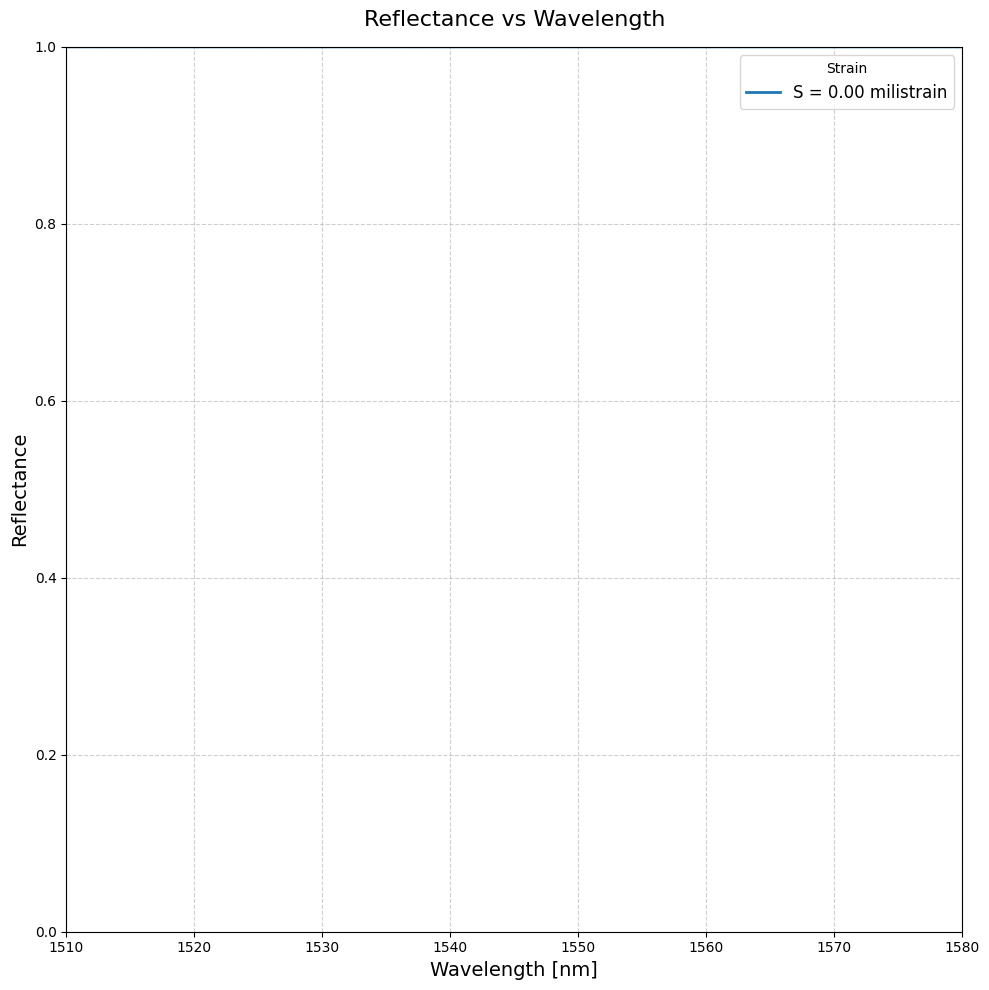

In [ ]:
cmap = plt.cm.viridis 

plt.figure(figsize=(10, 10))

# for i in range(len(S)):
#     if (i%3 == 0):
#         plt.plot(
#             wvg * 1e9,
#             Reflectance[i],
#             markerfacecolor='none',  # bola vazada
#             markersize=6,
#             linewidth=2,
#             color=cmap(0.8*i/len(S)),
#             label = f"S = {S[i]*1e3:.2f} milistrain"
#         )
#     else:
#         plt.plot(
#             wvg * 1e9,
#             Reflectance[i],
#             markerfacecolor='none',  # bola vazada
#             markersize=6,
#             alpha = 0.2,
#             linewidth=2,
#         )
i=0
plt.plot(
            wvg * 1e9,
            Reflectance[i],
            markerfacecolor='none',  # bola vazada
            markersize=6,
            linewidth=2,
            label = f"S = {S[i]*1e3:.2f} milistrain"
        )

plt.xlim(1510, 1580)
plt.ylim(0, 1)

plt.xlabel("Wavelength [nm]", fontsize=14)
plt.ylabel("Reflectance", fontsize=14)
plt.title("Reflectance vs Wavelength", fontsize=16, pad=15)
plt.legend(title="Strain", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig(os.getcwd() + fr"\RESULTADOS2\Reflectance_vs_wavelength_zerostrain.png", dpi=300, bbox_inches="tight")

plt.show()